<a href="https://colab.research.google.com/github/ismairdrs/bootcamp_analista_machine_learning/blob/main/Desafio_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [82]:
nome_do_arquivo='comp_bikes_mod.csv'
dataframe = pd.read_csv(nome_do_arquivo)

In [83]:
#No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
dataframe.shape 

(17379, 17)

In [84]:
#Quantos tipos diferentes de dados existem no dataset do desafio?
dataframe.info() # 2 tipos, float64 e object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [85]:
#Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
print(f'Total de linhas nulas para temp: {dataframe["temp"].isnull().sum()}')
print(f'Total de linhas no dataset: {len(dataframe.index)}')
print(f'% de nulos de temp: {dataframe["temp"].isnull().sum()/len(dataframe.index)}')

Total de linhas nulas para temp: 1738
Total de linhas no dataset: 17379
% de nulos de temp: 0.10000575407100523


In [89]:
#Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?
dataframe = dataframe[dataframe['dteday'].notna()]
dataframe.shape

(15641, 17)

In [93]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?
dataframe['temp'].mean()

0.4969259206597582

In [95]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?
dataframe['windspeed'].std()

0.12230930508286268

In [100]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?
print(len(dataframe['season'].value_counts()))

4


In [105]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?
dataframe.dteday = dataframe.dteday.apply(pd.to_datetime)
dataframe.tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


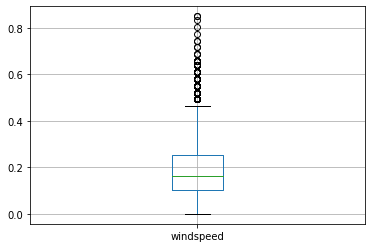

In [111]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed" (velocidade do vento), é CORRETO afirmar:
dataframe.boxplot(column='windspeed')
#Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

In [121]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt",
corr = dataset[["cnt", "hum","season", "temp", "atemp", "windspeed"]].corr()
corr.style.background_gradient(cmap=plt.get_cmap('PuRd'))

,cnt,hum,season,temp,atemp,windspeed
cnt,1.000000,-0.323834,0.173586,0.408528,0.404709,0.093503
hum,-0.323834,1.000000,0.149990,-0.066523,-0.052469,-0.292366
season,0.173586,0.149990,1.000000,0.310685,0.318424,-0.147692
temp,0.408528,-0.066523,0.310685,1.000000,0.987693,-0.015241
atemp,0.404709,-0.052469,0.318424,0.987693,1.000000,-0.056203
windspeed,0.093503,-0.292366,-0.147692,-0.015241,-0.056203,1.000000


In [122]:
#Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.
dataframe.hum.fillna(dataframe.hum.mean(), inplace=True)
dataframe.cnt.fillna(dataframe.cnt.mean(), inplace=True)
dataframe.casual.fillna(dataframe.casual.mean(), inplace=True)

x = dataframe[['hum', 'casual']].values
y = dataframe.cnt.values

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x, y)
predict = lreg.predict(x)

print(f'Y: {lreg.coef_} X: {lreg.intercept_}')

Y: [-99.75012328   2.21512197] X: 173.29337505135578


In [123]:
from sklearn.metrics import r2_score
r2 = r2_score(y, predict)
print(f'R2: {r2}')

R2: 0.4059859251122173


In [130]:
#Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".
#Aplique Árvore de Decisão como regressão
from sklearn.tree import DecisionTreeRegressor
treg = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y)
cross_val_score(treg, x, y, cv=15)

array([-1.45076062, -1.05055077, -0.02501152, -0.03310915, -0.00907291,
       -0.03086813, -0.05138066, -0.16848999,  0.02830814,  0.19838215,
        0.24488309,  0.21575132,  0.18884255,  0.22654318,  0.10664792])

In [131]:
treg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
#O valor obtido pela Árvore de Decisão como regressor apresenta maior R2.
print(f'{treg.score(xtest, ytest)}')

0.7350850901329229


In [134]:
#Comparando o SVM com a Árvore de Decisão é CORRETO afirmar:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [135]:
svr_predict= svr.predict(xtest)

In [136]:
print("SVM:\t\t\t{:0.5f}".format(svr.score(xtest, ytest))) 
print("Árvore de Decisão:\t{:0.5f}".format(treg.score(xtest, ytest))) 

SVM:			0.38942
Árvore de Decisão:	0.73509
